<a href="https://colab.research.google.com/github/vmr1532/kaggle-projects/blob/master/mnistsequencialsimplenn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/root/.kaggle/kaggle.json"
if not os.path.exists(os.path.dirname(filename)):
  os.makedirs(os.path.dirname(filename))
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [2]:
!pip install kaggle


In [3]:
!kaggle competitions download -c digit-recognizer

 93% 68.0M/73.2M [00:00<00:00, 92.0MB/s]
100% 73.2M/73.2M [00:00<00:00, 165MB/s] 
 84% 41.0M/48.8M [00:02<00:00, 15.1MB/s]
100% 48.8M/48.8M [00:02<00:00, 23.0MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 29.6MB/s]


In [4]:
!ls -ltr

total 125148
drwxr-xr-x 1 root root     4096 Apr  4 20:20 sample_data
-rw-r--r-- 1 root root     2532 Apr 17 02:41 adc.json
-rw-r--r-- 1 root root 76775041 Apr 17 02:42 train.csv
-rw-r--r-- 1 root root 51118296 Apr 17 02:42 test.csv
-rw-r--r-- 1 root root   240909 Apr 17 02:42 sample_submission.csv


In [0]:


import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas

In [0]:
import csv
import numpy
train1=pandas.read_csv("train.csv")
test1=pandas.read_csv("test.csv")

In [7]:
print(train1.shape)
print(train1.info())
train1.head()


(42000, 785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
X = numpy.asarray(train1.drop('label',axis=1),dtype=numpy.float32).reshape(-1,28,28)
yhat = numpy.asarray(train1['label'])

# Generate random indices for creating a random validation set with 20% of the labelled data
validx = (numpy.random.uniform(size=len(X)) <= 0.2)

# Create training set (80% of the labelled data)
X_trn = X[~validx]
y_trn = yhat[~validx]

# Create validation set (20% of the labelled data)
X_val = X[validx]
y_val = yhat[validx]

# Create the test set
X_tes = numpy.asarray(test1,dtype=numpy.float32).reshape(-1,28,28)

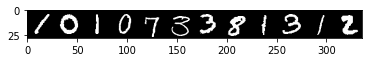

array([1, 0, 1, 0, 7, 3, 3, 8, 1, 3, 1, 2])

In [9]:
nvis = 12
plt.imshow(numpy.concatenate(X_trn[:nvis],axis=1),cmap='gray',vmin=0,vmax=255)
plt.show()

# Print the corresponding labels to check they match
y_trn[:nvis]

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
import keras,numpy
model=Sequential()
model.add(Flatten())
model.add(Dense(790, input_shape=(784,), activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(480, activation='relu'))
model.add(Dense(320, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_trn,keras.utils.to_categorical(y_trn, num_classes=10, dtype='int'), epochs=300, batch_size=128)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/400
33563/33563 [==============================] - 11s 337us/step - loss: 11.7110 - acc: 0.2705
Epoch 2/400
33563/33563 [==============================] - 11s 321us/step - loss: 13.0108 - acc: 0.1927
Epoch 3/400
33563/33563 [==============================] - 11s 319us/step - loss: 13.0101 - acc: 0.1928
Epoch 4/400
33563/33563 [==============================] - 11s 322us/step - loss: 13.0129 - acc: 0.1927
Epoch 5/400
33563/33563 [==============================] - 11s 323us/step - loss: 13.0129 - acc: 0.1927
Epoch 6/400
33563/33563 [==============================] - 11s 314us/step - loss: 13.0129 - acc: 0.1927
Epoch 7/400
33563/33563 [==============================] - 11s 320us/step - loss: 13.0129 - acc: 0.1927
Epoch 8/400
33563/33563 [==============================] - 11s 318us/step - loss: 13.0129 - acc: 0.1927
Epoch 9/400
33563/33563 [=======================

KeyboardInterrupt: ignored